In [1]:
import torch
from torch.nn import CrossEntropyLoss
import torch.optim as optim
import torchvision
import matplotlib.pyplot as plt
import random

In [ ]:
# =====================
# 데이터 불러오기
# =====================

train_data=torchvision.datasets.MNIST('./mnist/', train=True, download=True,
                                transform=torchvision.transforms.Compose([
                                torchvision.transforms.ToTensor(),
                                torchvision.transforms.Normalize((0.5,), (0.5,))
                                 ]))
test_data=torchvision.datasets.MNIST('./mnist/', train=False, download=True,
                                transform=torchvision.transforms.Compose([
                                torchvision.transforms.ToTensor(),
                                torchvision.transforms.Normalize((0.5,), (0.5,))
                                ]))

train_data, val_data = torch.utils.data.random_split(train_data, [len(train_data) - 1000, 1000])

In [3]:
batch_size_train = 100
batch_size_val = 100
batch_size_test = 100

train_loader = torch.utils.data.DataLoader(train_data,batch_size=batch_size_train, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data,batch_size=batch_size_val, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,batch_size=batch_size_test, shuffle=True)

In [4]:
# =====================
# 모델 구성
# =====================

from Model import Model

model = Model().to('cuda')

In [5]:
# =====================
# Loss, Optimizer 구성
# =====================

compute_loss = torch.nn.CrossEntropyLoss().to('cuda')
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [6]:
# =====================
# Train data로 학습
# =====================

train_losses = []
val_losses = []

for epoch in range(5):
    avg_loss = 0
    train_len = len(train_loader)

    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.to('cuda')
        target = target.to('cuda')

        optimizer.zero_grad()

        # Foward propagation
        output = model(data)

        # Computing loss
        loss = compute_loss(output, target)
        
        # Back propagation
        loss.backward()
        optimizer.step()

        avg_loss += loss / train_len

    # Epoch가 한 번 끝날 때마다 Validation
    else:
      val_loss = 0
      val_len = len(val_loader)

      # grad 계산 안함
      with torch.no_grad():
        for X_val, y_val in val_loader:
            X_val = X_val.to('cuda')
            y_val = y_val.to('cuda')

            pred = model(X_val)

            # Computing loss
            loss = compute_loss(pred, y_val)

            val_loss += loss / val_len

      val_losses.append(val_loss)
      train_losses.append(avg_loss)
        
    print('epoch: %02d,' % (epoch + 1), 'train_loss = {:.3f},'.format(avg_loss), 'val_loss = {:.3f}'.format(val_loss))

print('\nTraining is completed')

epoch: 01, train_loss = 0.170, val_loss = 0.055
epoch: 02, train_loss = 0.068, val_loss = 0.048
epoch: 03, train_loss = 0.055, val_loss = 0.041
epoch: 04, train_loss = 0.051, val_loss = 0.047
epoch: 05, train_loss = 0.046, val_loss = 0.094

Training is completed


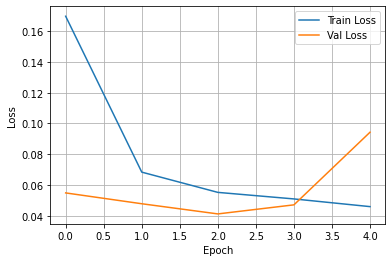

In [7]:
# loss 그래프

plt.plot(train_losses)
plt.plot(val_losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['Train Loss', 'Val Loss'], loc='upper right')
plt.grid()

In [8]:
# =====================
# Test accuracy
# =====================

correct = 0
total = 0

# test data이므로 grad 계산 안함
with torch.no_grad():
  for batch_idx, (X_test, y_test) in enumerate(test_loader):
      X_test = X_test.to('cuda')
      y_test = y_test.to('cuda')

      pred = model(X_test)
      # pred의 각 행에서 가장 높은 값의 index 와 y_test가 일치한 개수
      correct += (torch.argmax(pred, 1) == y_test).sum()
      total += len(X_test)

print('Accuracy: %d / %d'%(correct, total))

Accuracy: 9811 / 10000


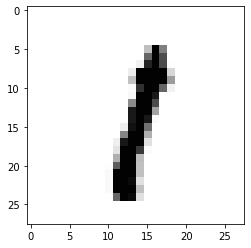

Random number: 1
Prediction result:  1


In [10]:
# ==========================
# 랜덤으로 숫자 뽑아서 test
# ==========================

r = random.randint(0, len(test_data)-1) # 0~9999까지 랜덤한 정수
rand_data = test_data.data[r].view(-1, 1, 28, 28).float().to('cuda')
rand_target = test_data.targets[r].to('cuda')

plt.imshow(test_data.data[r].view(28,28), cmap='Greys', interpolation='nearest')
plt.show()
print('Random number:', rand_target.item())

# 예측
rand_pred = model(rand_data)
print('Prediction result: ', torch.argmax(rand_pred, 1).item())